In [1]:
# ================================
# Arabic Authorship Style Transfer – EDA
# ================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# -------------------------------
# STEP 1: Load the FULL Dataset
# -------------------------------
# from google.colab import files
# uploaded = files.upload()  # Upload train.xlsx and val.xlsx

# Read the ENTIRE files now (no nrows limit)
train_df = pd.read_excel('./AuthorshipStyleTransferTask1/AuthorshipStyleTransferTrain.xlsx', engine='openpyxl')
val_df = pd.read_excel('./AuthorshipStyleTransferTask1/AuthorshipStyleTransferVal.xlsx', engine='openpyxl')

print("▶️ Full Train shape:", train_df.shape)
print("▶️ Full Validation shape:", val_df.shape)


▶️ Full Train shape: (35122, 4)
▶️ Full Validation shape: (4157, 4)


In [4]:
# -------------------------------
# STEP 2: Inspect Structure
# -------------------------------
print("\nTrain Columns:", train_df.columns)
print("\nTrain Sample:\n", train_df.head(3))

# Check for missing data
print("\nMissing values:\n", train_df.isnull().sum())


Train Columns: Index(['id', 'text_in_msa', 'text_in_author_style', 'author'], dtype='object')

Train Sample:
      id                                        text_in_msa  \
0  5843  تسهم الكتب التي قمت بنشرها منذ بدء كتابة زاوية...   
1  5844  من الصعب للغاية، في ظل هذا التقسيم الإرهابي، أ...   
2  5845  كان من الممكن تجنب هذا الموضوع الحساس والتركيز...   

                                text_in_author_style      author  
0  هذه الكتب التي أصدرتُها منذ بدأت كتابة باب "من...  يوسف إدريس  
1  صعب جِدًّا في ظل هذا التقسيم الإرهابي أن أقول ...  يوسف إدريس  
2  كان ممكنًا أن أتفادى هذا\n\nالموضوع الشائك، وأ...  يوسف إدريس  

Missing values:
 id                      0
text_in_msa             0
text_in_author_style    0
author                  0
dtype: int64


C:\Users\billal\AppData\Local\Temp\ipykernel_3380\3777757737.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=author_table['Author'], x=author_table['Sample Count'], palette="viridis")


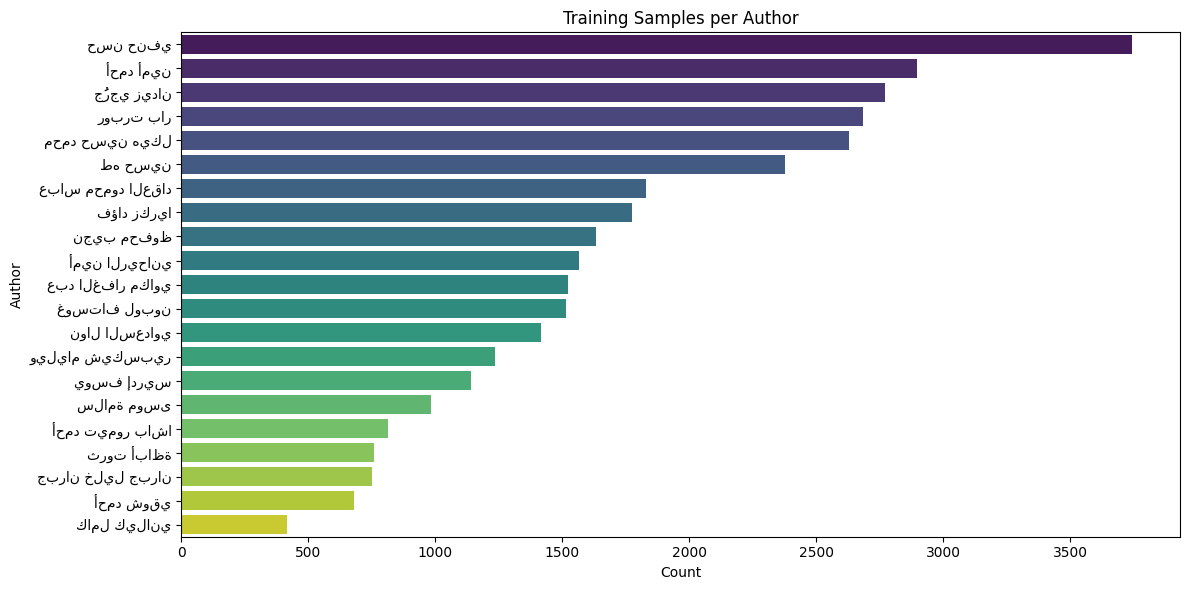


📊 Author Sample Distribution Table:



,Author,Sample Count
0,حسن حنفي,3744
1,أحمد أمين,2897
2,جُرجي زيدان,2768
3,روبرت بار,2682
4,محمد حسين هيكل,2627
5,طه حسين,2376
6,عباس محمود العقاد,1829
7,فؤاد زكريا,1773
8,نجيب محفوظ,1634
9,أمين الريحاني,1567


In [5]:
# -------------------------------
# STEP 3: Author Distribution (Chart + Table)
# -------------------------------

# Count number of samples per author
author_counts = train_df['author'].value_counts().sort_values(ascending=False)

# Convert to DataFrame for table rendering
author_table = author_counts.reset_index()
author_table.columns = ['Author', 'Sample Count']

# Barplot
plt.figure(figsize=(12, 6))
sns.barplot(y=author_table['Author'], x=author_table['Sample Count'], palette="viridis")
plt.title("Training Samples per Author")
plt.xlabel("Count")
plt.ylabel("Author")
plt.tight_layout()
plt.show()

# Display table below chart
print("\n📊 Author Sample Distribution Table:\n")
display(author_table.head(21))  # Show all 21 authors


         msa_length  style_length
count  35122.000000  35122.000000
mean    1923.201697   1839.765702
std      331.469260    314.538395
min       21.000000     22.000000
25%     1806.000000   1769.000000
50%     1967.000000   1925.000000
75%     2100.000000   2000.000000
max    11252.000000  11639.000000


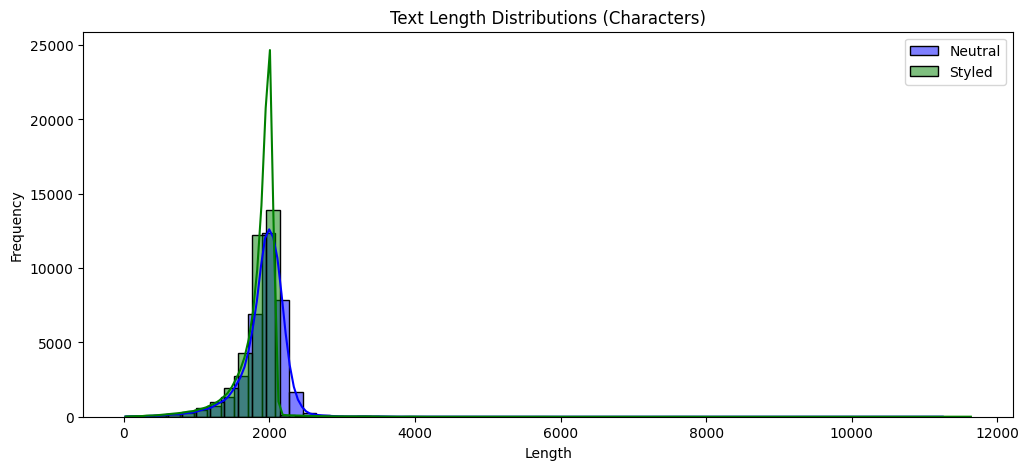

In [11]:
# -------------------------------
# STEP 4: Text Length Analysis
# -------------------------------
# Add lengths
train_df['msa_length'] = train_df['text_in_msa'].astype(str).apply(len)
train_df['style_length'] = train_df['text_in_author_style'].astype(str).apply(len)

# Describe
print(train_df[['msa_length', 'style_length']].describe())

# Compare visually
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
sns.histplot(train_df['msa_length'], bins=60, kde=True, label='Neutral', color='blue')
sns.histplot(train_df['style_length'], bins=60, kde=True, label='Styled', color='green')
plt.title("Text Length Distributions (Characters)")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.legend()
plt.show()


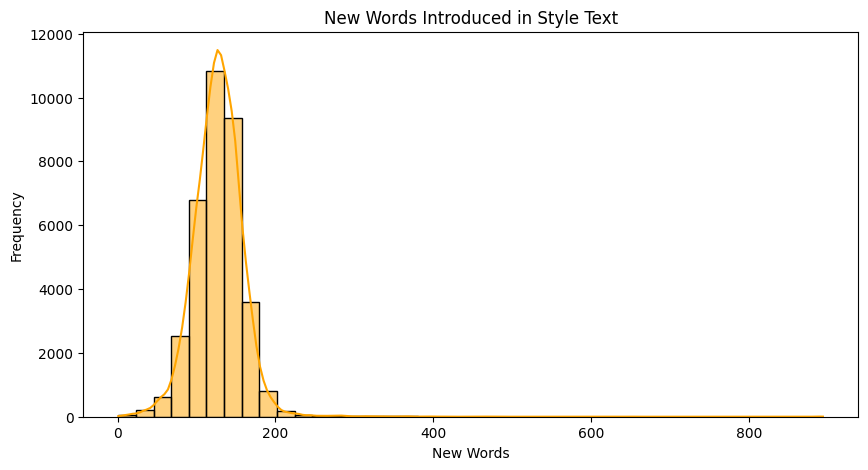


Average new words per example: 127.71317123170662

📊 Average New Words by Author:


,Author (RTL),Average New Words
2,‏أحمد شوقي,162.752577
15,‏كامل كيلاني,160.601449
20,‏يوسف إدريس,141.008772
4,‏ثروت أباظة,139.235139
13,‏غوستاف لوبون,138.996040
17,‏نجيب محفوظ,138.123623
9,‏سلامة موسى,137.601626
1,‏أحمد تيمور باشا,135.958282
19,‏ويليام شيكسبير,135.205502
10,‏طه حسين,133.959596


In [12]:
# -------------------------------
# STEP 5: Token Difference Estimation
# -------------------------------

def diff_words(row):
    msa_words = set(str(row['text_in_msa']).split())
    style_words = set(str(row['text_in_author_style']).split())
    return len(style_words - msa_words)

train_df['new_words'] = train_df.apply(diff_words, axis=1)

# 📊 Plot chart
plt.figure(figsize=(10, 5))
sns.histplot(train_df['new_words'], bins=40, kde=True, color='orange')
plt.title("New Words Introduced in Style Text")
plt.xlabel("New Words")
plt.ylabel("Frequency")
plt.show()

# 📋 Show overall average
print("\nAverage new words per example:", train_df['new_words'].mean())

# 📋 Add table: average new words per author (Author column RTL only)
author_rtl_table = train_df.groupby('author')['new_words'].mean().reset_index()
author_rtl_table['author'] = author_rtl_table['author'].apply(lambda x: '\u200F' + x)
author_rtl_table.columns = ['Author (RTL)', 'Average New Words']

print("\n📊 Average New Words by Author:")
display(author_rtl_table.sort_values(by='Average New Words', ascending=False))


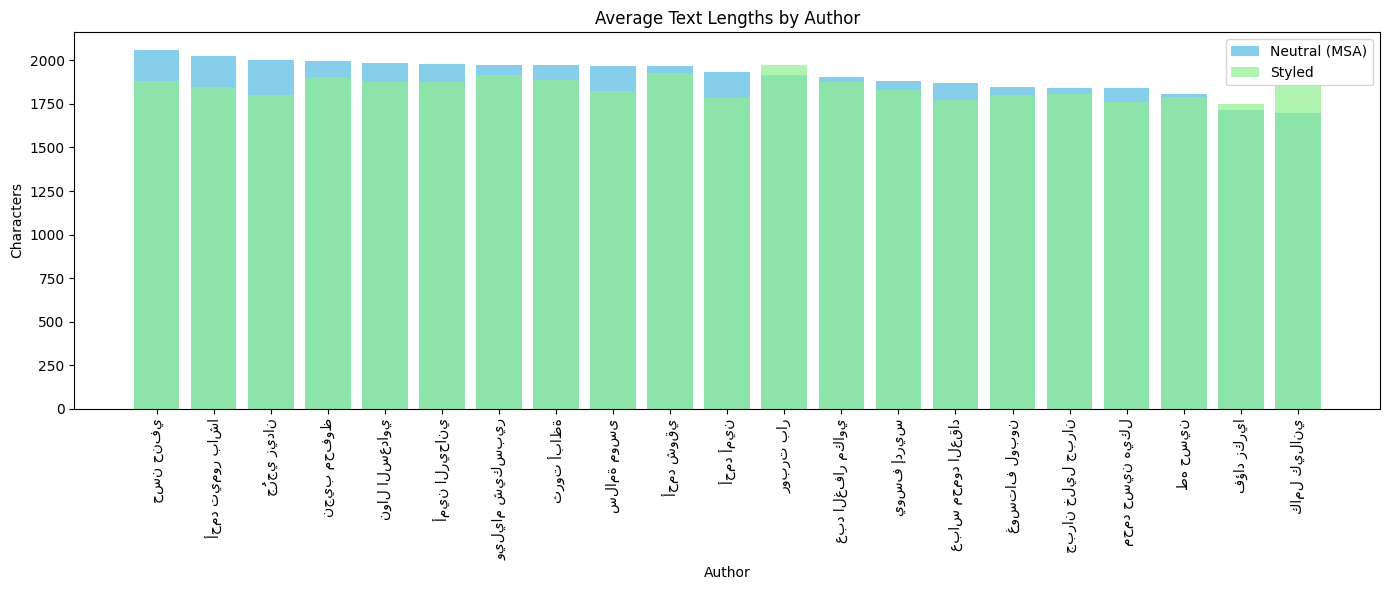


📊 Average Text Lengths (in Characters) per Author:


,Author (RTL),Avg MSA Length,Avg Styled Length
7,‏حسن حنفي,2058.606303,1882.885684
1,‏أحمد تيمور باشا,2024.062577,1844.682209
6,‏جُرجي زيدان,2004.656792,1803.100434
17,‏نجيب محفوظ,1998.574663,1902.799266
18,‏نوال السعداوي,1986.126502,1875.328622
3,‏أمين الريحاني,1977.924059,1873.964901
19,‏ويليام شيكسبير,1974.326861,1915.995146
4,‏ثروت أباظة,1971.397622,1887.019815
9,‏سلامة موسى,1968.797764,1823.269309
2,‏أحمد شوقي,1965.315169,1925.686303


from matplotlib import pyplot as plt
summary_table['Avg MSA Length'].plot(kind='hist', bins=20, title='Avg MSA Length')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_table['Avg Styled Length'].plot(kind='hist', bins=20, title='Avg Styled Length')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_table.plot(kind='scatter', x='Avg MSA Length', y='Avg Styled Length', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_table['Avg MSA Length'].plot(kind='line', figsize=(8, 4), title='Avg MSA Length')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
summary_table['Avg Styled Length'].plot(kind='line', figsize=(8, 4), title='Avg Styled Length')
plt.gca().spines[['top', 'right']].set_visible(False)

In [13]:
# -------------------------------
# STEP 6: Per-Author Length Comparison (with Table + RTL)
# -------------------------------

# 1. Compute average lengths per author
author_stats = train_df.groupby('author')[['msa_length', 'style_length']].mean().reset_index()

# 2. Convert author names to RTL visually
author_stats['author_rtl'] = author_stats['author'].apply(lambda x: '\u200F' + x)

# 3. Sort by msa_length
author_stats = author_stats.sort_values(by='msa_length', ascending=False)

# 4. Plot
plt.figure(figsize=(14, 6))
plt.bar(author_stats['author_rtl'], author_stats['msa_length'], label='Neutral (MSA)', color='skyblue')
plt.bar(author_stats['author_rtl'], author_stats['style_length'], bottom=author_stats['msa_length'] * 0,
        label='Styled', alpha=0.7, color='lightgreen')
plt.title("Average Text Lengths by Author")
plt.ylabel("Characters")
plt.xlabel("Author")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

# 5. Show summary table
summary_table = author_stats[['author_rtl', 'msa_length', 'style_length']]
summary_table.columns = ['Author (RTL)', 'Avg MSA Length', 'Avg Styled Length']

print("\n📊 Average Text Lengths (in Characters) per Author:")
display(summary_table)


In [14]:
# -------------------------------
# STEP 7: Sample Output Inspection
# -------------------------------
for i in range(3):
    print(f"\nSample {i+1}")
    print("🟦 Neutral Text:")
    print(train_df.loc[i, 'text_in_msa'])
    print("🟩 Target Author Style:", train_df.loc[i, 'author'])
    print(train_df.loc[i, 'text_in_author_style'])


Sample 1
🟦 Neutral Text:
تسهم الكتب التي قمت بنشرها منذ بدء كتابة زاوية "من مفكرة يوسف إدريس" في جريدة الأهرام كل يوم اثنين، في طرح سؤال لا يزال مطروحًا حتى اليوم، حيث أواجه هذا الاستفسار في مختلف الأماكن: لماذا قلَّلتَ بشكل كبير من إنتاجك الأدبي والمسرحي، وكدتَ تتفرغ تمامًا لكتابة المفكرة؟ صحيح أن هذه الكتابة تتناول قضايا ثقافية وسياسية واجتماعية بالغة الأهمية في حياتنا، إلا أننا نعتقد أنه ينبغي لك كاتب القصة، الذي يُلقَّب بألقاب لا أرى أني أستحقها، أن يكرس جهده في كتابة القصص والمسرحيات، بدلاً من الانشغال بهذا الجانب الصحفي.

وللحق، كثيرًا ما أُجيب على هذا السؤال بأسلوب يشوبه العفوية، إذ إن تكرار نفس الأسئلة والهواجس مئات المرات، مما يحتم عليَّ تقديم نفس الإجابات، يجعل الأمر يبدو مملًا بلا فائدة. وغالبًا ما أجد نفسي، بعد كل حوار من هذا النوع، أقوم بتأمل المسألة فأدرك أنها أحيانًا تُعتبر مسألة هزلية تمامًا، إذ لو قمنا بتغيير الزاوية قليلاً، فإنها ستتحول إلى "نكتة" تثير الضحك.

فالذين يستفسرون يعترفون بأن القضايا التي أتناولها تُعتبر من "أهم قضايا حياتنا في الثقافة والسياسة والاقتصاد 